# Rf 3 0 1_Composition
Multidimensional models: multi-dimensional p.d.f.s through composition
 e.g. substituting a p.d.f parameter with a function that depends on other observables

 pdf = gauss(x,f(y),s) with f(y) = a0 + a1*y



**Author:** 07/2008 - Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:46 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataSet.h"
#include "RooGaussian.h"
#include "RooPolyVar.h"
#include "RooPlot.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "TH1.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;

Setup composed model gauss(x,m(y),s)
 -----------------------------------------------------------------------

Create observables

In [3]:
RooRealVar x("x", "x", -5, 5);
RooRealVar y("y", "y", -5, 5);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create function f(y) = a0 + a1*y

In [4]:
RooRealVar a0("a0", "a0", -0.5, -5, 5);
RooRealVar a1("a1", "a1", -0.5, -1, 1);
RooPolyVar fy("fy", "fy", y, RooArgSet(a0, a1));

Create gauss(x,f(y),s)

In [5]:
RooRealVar sigma("sigma", "width of gaussian", 0.5);
RooGaussian model("model", "Gaussian with shifting mean", x, fy, sigma);

Sample data, plot data and pdf on x and y
 ---------------------------------------------------------------------------------

Generate 10000 events in x and y from model

In [6]:
RooDataSet *data = model.generate(RooArgSet(x, y), 10000);

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Plot x distribution of data and projection of model on x = int(dy) model(x,y)

In [7]:
RooPlot *xframe = x.frame();
data->plotOn(xframe);
model.plotOn(xframe);

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on x integrates over variables (y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[y]_Norm[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Plot x distribution of data and projection of model on y = int(dx) model(x,y)

In [8]:
RooPlot *yframe = y.frame();
data->plotOn(yframe);
model.plotOn(yframe);

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on y integrates over variables (x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Make two-dimensional plot in x vs y

In [9]:
TH1 *hh_model = model.createHistogram("hh_model", x, Binning(50), YVar(y, Binning(50)));
hh_model->SetLineColor(kBlue);

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Make canvas and draw rooplots

In [10]:
TCanvas *c = new TCanvas("rf301_composition", "rf301_composition", 1200, 400);
c->Divide(3);
c->cd(1);
gPad->SetLeftMargin(0.15);
xframe->GetYaxis()->SetTitleOffset(1.4);
xframe->Draw();
c->cd(2);
gPad->SetLeftMargin(0.15);
yframe->GetYaxis()->SetTitleOffset(1.4);
yframe->Draw();
c->cd(3);
gPad->SetLeftMargin(0.20);
hh_model->GetZaxis()->SetTitleOffset(2.5);
hh_model->Draw("surf");

Draw all canvases 

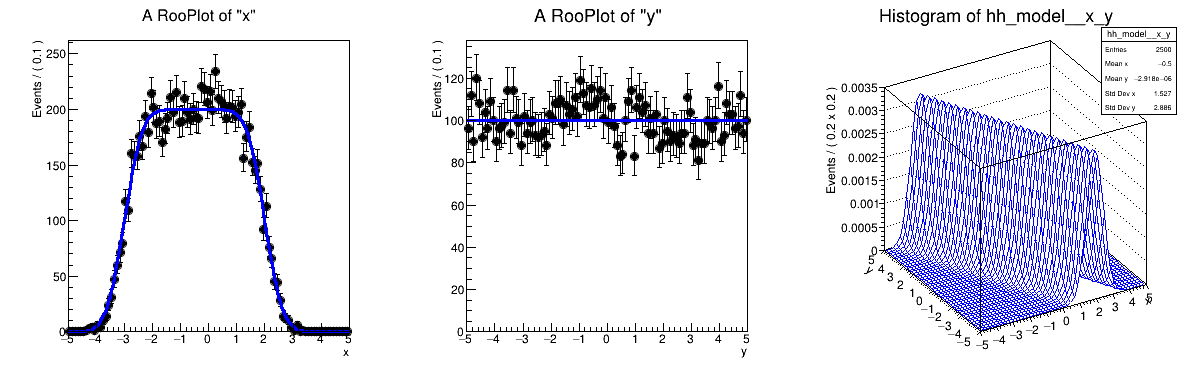

In [11]:
gROOT->GetListOfCanvases()->Draw()